# wine + soil + climate
- 데이터 정리
- SVM 적용

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

## clensing & encoding
- 클렌징, 인코딩, 스케일링 부분
    - wine_data_EDA2.ipynb: 이 파일에서 “결측치 처리” 파트까지 진행해주시면 되고,
    - Machine_Learning_total.ipynb: 이 파일에서 ~ one-hot encoding 까지 적용 후, SVM이나 다른 머신러닝 진행하면서 사용하셨던 StandardScaler까지 적용해주시면 될 것 같습니다!

### Wine_data_EDA2
#### 포도 품종 정리하기

##### wine_total_data_0721.csv파일에 적용하기

In [2]:
data = pd.DataFrame()
dfList = []
for files in os.listdir('data'):
    if files.startswith('wine_total_data_0721'):
        print(files)
        dfNM = 'df_{}'.format(files[-8:-4])
        dfList.append(dfNM)
        globals()[dfNM] = pd.read_csv('data/' + files)
        globals()[dfNM].drop(['Unnamed: 0'], axis = 1, inplace = True)
        data = pd.concat([data, globals()[dfNM]])

wine_total_data_0721.csv


In [3]:
LEN = 0
for i in range(len(dfList)):
    LEN += len(globals()[dfList[i]])
if LEN == len(data):
    print(LEN, len(data))
    print('Data 합치기 완료')

13822 13822
Data 합치기 완료


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13822 entries, 0 to 13821
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longitude          13822 non-null  float64
 1   Latitude           13822 non-null  float64
 2   Soil Mapping Unit  13822 non-null  int64  
 3   Continent          13822 non-null  object 
 4   Country            13822 non-null  object 
 5   Region Lv1         13760 non-null  object 
 6   Grape_Variety      13802 non-null  object 
 7   SHARE_x            13822 non-null  int64  
 8   WRB4_x             13822 non-null  object 
 9   KOPPEN             13822 non-null  object 
 10  TEXTURE_USDA_x     13416 non-null  float64
 11  REF_BULK_DENSITY   13416 non-null  float64
 12  BULK_DENSITY       13822 non-null  float64
 13  DRAINAGE_x         13416 non-null  object 
 14  ROOT_DEPTH_x       13822 non-null  int64  
 15  AWC_x              13822 non-null  int64  
 16  ROOTS_x            626

In [5]:
if 'year' not in data.columns:
    print(data['Year'].unique())

[2021]


In [6]:
data.head()

,Longitude,Latitude,Soil Mapping Unit,Continent,Country,Region Lv1,Grape_Variety,SHARE_x,WRB4_x,KOPPEN,TEXTURE_USDA_x,REF_BULK_DENSITY,BULK_DENSITY,DRAINAGE_x,ROOT_DEPTH_x,AWC_x,ROOTS_x,IL_x,HWSD2_SMU_ID_y,SEQUENCE,SHARE_y,WRB4_y,ROOT_DEPTH_y,ROOTS_y,IL_y,SWR,DRAINAGE_y,AWC_y,COARSE,SAND,SILT,CLAY,TEXTURE_USDA_y,TEXTURE_SOTER,BULK,REF_BULK,ORG_CARBON,PH_WATER,TOTAL_N,CN_RATIO,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,Top12_Grape,LatRound,LngRound,LatInt,LngInt,lat,lon,TG,TN,TX,RR,RR1,Year,lat_round,lon_round,lat_int,lon_int
0,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,11.0,1.69,1.5,MW,1,142,NaN,NaN,12245,1,60,FLeu,1.0,NaN,NaN,NaN,MW,142.0,3,55,27,18,11.0,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,1,-41.0,-63.0,-40,-63,-40.75,-63.75,290.671964,278.31567,303.50006,14.568954,1.333333,2021,-41.0,-64.0,-40,-63
1,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,11.0,1.69,1.5,MW,1,142,NaN,NaN,12245,1,60,FLeu,1.0,NaN,NaN,NaN,MW,142.0,3,55,27,18,11.0,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,1,-41.0,-63.0,-40,-63,-40.75,-63.25,290.655011,278.43283,303.47107,15.902047,1.428571,2021,-41.0,-63.0,-40,-63
2,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,11.0,1.69,1.5,MW,1,142,NaN,NaN,12245,1,60,FLeu,1.0,NaN,NaN,NaN,MW,142.0,3,55,27,18,11.0,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,1,-41.0,-63.0,-40,-63,-40.25,-63.75,291.058975,278.14188,304.67847,13.090754,1.285714,2021,-40.0,-64.0,-40,-63
3,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,11.0,1.69,1.5,MW,1,142,NaN,NaN,12245,1,60,FLeu,1.0,NaN,NaN,NaN,MW,142.0,3,55,27,18,11.0,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,1,-41.0,-63.0,-40,-63,-40.25,-63.25,290.893624,278.20532,304.39062,17.103797,1.500000,2021,-40.0,-63.0,-40,-63
4,-63.358333,-40.775000,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,11.0,1.69,1.5,MW,1,142,NaN,NaN,12245,1,60,FLeu,1.0,NaN,NaN,NaN,MW,142.0,3,55,27,18,11.0,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,1,-41.0,-63.0,-40,-63,-40.75,-63.75,290.671964,278.31567,303.50006,14.568954,1.333333,2021,-41.0,-64.0,-40,-63


In [7]:
# 현재의 온도는 K 기준으로 되어 있어서 섭씨로 변경해줌
data['TG'] = data['TG'] - 273
data['TN'] = data['TN'] - 273
data['TX'] = data['TX'] - 273

In [8]:
data['Grape_Variety'] = data['Grape_Variety'].str.strip()
len(data['Grape_Variety'].unique())

187

In [9]:
grapes = [grape for grape in data.loc[~data['Grape_Variety'].isna(), 'Grape_Variety'].unique()]
grapes = sorted(grapes)
grapes

['aglianico',
 'albarin negro',
 'albarin negro mencia',
 'albarossa',
 'albillo criolo',
 'aleatico',
 'alfrocheiro preto',
 'alicante bouschet',
 'aligote',
 'aragonez',
 'areni noir',
 'assyrtiko',
 'baga',
 'barbera',
 'bastardo',
 'bical',
 'blatina',
 'blaufrankisch',
 'bobal',
 'bonarda',
 'bordeaux blend red',
 'bourboulenc',
 'brachetto',
 'brandy',
 'cabernet',
 'cabernet franc',
 'cabernet sauvignon',
 'cabernet savignon',
 'callet',
 'cardin',
 'carignan',
 'carignan gris',
 'carinena',
 'carmenere',
 'carrasquin',
 'chambourcin',
 'champagne blend',
 'chardonnay',
 'chasselas',
 'chenin blanc',
 'cinsault',
 'clairette',
 'concord',
 'corvina',
 'counoise',
 'criolla grande',
 'croatina',
 'debina',
 'dolcetto',
 'feteasca neagra',
 'fogoneu',
 'frankovka',
 'freisa',
 'furmint',
 'galego dourado',
 'gamaret',
 'gamay',
 'garnacha',
 'garnacha blanca',
 'garnacha tintorera',
 'gewurztraminer',
 'giro',
 'godello',
 'graciano',
 'grasevina',
 'greco nero',
 'grenache',
 'gr

In [10]:
# 동일 품종 or 오타 수정
data.loc[data['Grape_Variety'].isin(['albarin negro mencia']), 'Grape_Variety'] = 'albarin negro'
data.loc[data['Grape_Variety'].isin(['aragonez', 'tinta roriz', ]), 'Grape_Variety'] = 'tempranillo'
data.loc[data['Grape_Variety'].isin(['cabernet', 'cabernet savignon']), 'Grape_Variety'] = 'cabernet sauvignon'
data.loc[data['Grape_Variety'].isin(['carinena']), 'Grape_Variety'] = 'carignan'
data.loc[data['Grape_Variety'].isin(['garnacha', 'grenache tinta', ]), 'Grape_Variety'] = 'grenache'
data.loc[data['Grape_Variety'].isin(['garnacha tintorera', 'grenache tintorera']), 'Grape_Variety'] = 'alicante bouschet'
data.loc[data['Grape_Variety'].isin(['pinot noir precoce']), 'Grape_Variety'] = 'pinot noir'
data.loc[data['Grape_Variety'].isin(['shiraz and syrah']), 'Grape_Variety'] = 'syrah'
data.loc[data['Grape_Variety'].isin(['tanat']), 'Grape_Variety'] = 'tannat'

print(data['Grape_Variety'].nunique(), data['Grape_Variety'].unique())


173 ['malbec' 'cabernet sauvignon' 'pinot noir' 'bastardo' 'merlot' 'syrah'
 'carmenere' 'zinfandel' 'alicante bouschet' 'palomino' 'cabernet franc'
 'petit verdot' 'petit sirah' 'gewurztraminer' 'riesling' 'chardonnay'
 'grenache' 'mauzac' 'mourvedre' 'grenache blanc' 'clairette' 'roussanne'
 'bourboulenc' 'marsanne' 'saperavi' 'nebbiolo' 'nosiola' 'corvina'
 'rondinella' 'vranac' 'kratosija' 'galego dourado' 'sauvignon blanc'
 'pinot gris' 'cinsault' nan 'carignan' 'tempranillo' 'tannat' 'barbera'
 'marselan' 'pinotage' 'viognier' 'sangiovese' 'tinta barroca'
 'touriga nacional' 'touriga franca' 'tinto cao' 'bonarda' 'cardin'
 'freisa' 'raboso veronese' 'greco nero' 'criolla grande' 'torrontes'
 'aglianico' 'montepulciano' 'graciano' 'muscat' 'counoise' 'norton'
 'concord' 'chambourcin' 'plavac_mali' 'blatina' 'teran' 'kadarka blau'
 'gamay' 'blaufrankisch' 'zweigelt' 'sankt laurent' 'grasevina'
 'xynisteri' 'nielluccio' 'sciaccarello' 'semillon' 'sauvignon gris'
 'muscadelle' 'pouls

In [11]:
# wine_data_EDA2.ipynb의 17번 cell df['Grape_Variety'].unique() 결과와 비교한 결과

a = ['malbec', 'cabernet sauvignon', 'pinot noir', 'bastardo', 'merlot',
       'syrah', 'carmenere', 'zinfandel', 'alicante bouschet', 'palomino',
       'cabernet franc', 'petit verdot', 'petit sirah', 'gewurztraminer',
       'riesling', 'chardonnay', 'grenache', 'mauzac', 'mourvedre',
       'grenache blanc', 'clairette', 'roussanne', 'bourboulenc',
       'marsanne', 'saperavi', 'nebbiolo', 'nosiola', 'corvina',
       'rondinella', 'vranac', 'kratosija', 'galego dourado',
       'sauvignon blanc', 'pinot gris', 'cinsault', 'carignan',
       'tempranillo', 'tannat', 'barbera', 'marselan', 'pinotage',
       'viognier', 'sangiovese', 'tinta barroca', 'touriga nacional',
       'touriga franca', 'tinto cao', 'bonarda', 'cardin', 'freisa',
       'raboso veronese', 'greco nero', 'criolla grande', 'torrontes',
       'aglianico', 'montepulciano', 'graciano', 'muscat', 'counoise',
       'norton', 'concord', 'chambourcin', 'plavac_mali', 'blatina',
       'teran', 'kadarka blau', 'gamay', 'blaufrankisch', 'zweigelt',
       'sankt laurent', 'grasevina', 'xynisteri', 'nielluccio',
       'sciaccarello', 'semillon', 'sauvignon gris', 'muscadelle',
       'poulsard', 'savagnin', 'aligote', 'vin de liqueur',
       'carignan gris', 'chenin blanc', 'melon de bourgogne', 'brandy',
       'mtsvane', 'tsolikouri', 'tavkveri', 'croatina', 'morellino',
       'brachetto', 'dolcetto', 'lagrein', 'sagrantino', "nero d'avola",
       'pelaverga', 'albarossa', 'marzemino', 'raboso',
       'nerello mascalese', 'nerello cappuccio', 'aleatico',
       'feteasca neagra', 'baga', 'bical', 'ramisco', 'negroamaro',
       'pinot meunier', 'alfrocheiro preto', 'vijariego negro',
       'listan negro', 'red blend', 'negramoll', 'listan blanco',
       'albillo criolo', 'rioja red blend', 'monastrell', 'moristel',
       'callet', 'fogoneu', 'manto negro', 'mantonegro', 'bobal',
       'rome negro', 'giro', 'bordeaux blend red', 'pinot blanc',
       'macabeo', 'areni noir', 'mencia', 'lledoner pelut',
       'garnacha blanca', 'tinta de toro', 'maturana', 'albarin negro',
       'carrasquin', 'verdejo tinto', 'verdejo', 'verdejo negro',
       'godello', 'prokupac', 'rose blend', 'gamaret', 'frankovka',
       'chasselas', 'silvaner', 'rieslaner', 'assyrtiko',
       'champagne blend', 'white blend', 'mavro', 'robola', 'xinomavro',
       'vidiano', 'liatiko', 'vilana', 'malagousia', 'malvasia',
       'savatiano', 'roditis', 'limnio', 'muscat of alexandria',
       'muscat blanc a petits grains', 'sideritis', 'negoska', 'debina',
       'moschofilero', 'mavrodaphne', 'furmint', 'keknyelu', 'harslevelu',
       'juhfark', 'welschriesling']

print(set(data['Grape_Variety'].unique()).symmetric_difference(set(a)))


{nan}


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13822 entries, 0 to 13821
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longitude          13822 non-null  float64
 1   Latitude           13822 non-null  float64
 2   Soil Mapping Unit  13822 non-null  int64  
 3   Continent          13822 non-null  object 
 4   Country            13822 non-null  object 
 5   Region Lv1         13760 non-null  object 
 6   Grape_Variety      13802 non-null  object 
 7   SHARE_x            13822 non-null  int64  
 8   WRB4_x             13822 non-null  object 
 9   KOPPEN             13822 non-null  object 
 10  TEXTURE_USDA_x     13416 non-null  float64
 11  REF_BULK_DENSITY   13416 non-null  float64
 12  BULK_DENSITY       13822 non-null  float64
 13  DRAINAGE_x         13416 non-null  object 
 14  ROOT_DEPTH_x       13822 non-null  int64  
 15  AWC_x              13822 non-null  int64  
 16  ROOTS_x            626

In [13]:
top12_grape = ['malbec', 'cabernet sauvignon', 'pinot noir', 'merlot', 'grenache',
               'syrah', 'cabernet franc', 'tempranillo', 'nebbiolo', 'sangiovese',
               'montepulciano', 'zinfandel']

data['Top12_Grape'] = 0
data.loc[data['Grape_Variety'].isin(top12_grape), 'Top12_Grape'] = 1
data['Top12_Grape'].value_counts()

Top12_Grape
1    9268
0    4554
Name: count, dtype: int64

In [14]:
# wine_data_EDA2.ipynb의 23번 cell 결과와 비교한 결과

# Top12_Grape
# 1    9268
# 0    4554
# Name: count, dtype: int64

ratio_1 = data['Top12_Grape'].value_counts()[0] / data['Top12_Grape'].value_counts()[1]
ratio_2 = 4554 / 9268

if ratio_1 == ratio_2:
    print('Good')

Good


In [15]:
grape_dic = {
    'malbec' : 1,
    'cabernet sauvignon' : 2,
    'pinot noir' : 3 ,
    'merlot' : 4,
    'grenache' : 5,
    'syrah' : 6,
    'cabernet franc' :7,
    'tempranillo' : 8,
    'nebbiolo' : 9,
    'sangiovese' : 10,
    'montepulciano' : 11,
    'zinfandel' : 12
}
# "cannot reindex on an axis with duplicate labels" error에서는 reset_index 해줘야 함
data.reset_index(drop = True, inplace = True)
data['Grape_Variety'] = data.loc[data['Top12_Grape'] == 1]['Grape_Variety'].map(grape_dic)
data.loc[data['Grape_Variety'].isnull(), 'Grape_Variety'] = 0
data['Grape_Variety'].value_counts()
     

Grape_Variety
0.0     4554
6.0     1899
2.0     1651
3.0     1505
4.0     1111
5.0      776
7.0      553
1.0      440
10.0     437
9.0      388
8.0      330
11.0     108
12.0      70
Name: count, dtype: int64

In [16]:
# wine_data_EDA2.ipynb의 24번 cell 결과와 비교한 결과

# Grape_Variety
# 0.0     4554
# 6.0     1899
# 2.0     1651
# 3.0     1505
# 4.0     1111
# 5.0      776
# 7.0      553
# 1.0      440
# 10.0     437
# 9.0      388
# 8.0      330
# 11.0     108
# 12.0      70
# Name: count, dtype: int64

data['Grape_Variety'].value_counts()

Grape_Variety
0.0     4554
6.0     1899
2.0     1651
3.0     1505
4.0     1111
5.0      776
7.0      553
1.0      440
10.0     437
9.0      388
8.0      330
11.0     108
12.0      70
Name: count, dtype: int64

### Wine_data_EDA2
#### 데이터 결측치 처리

In [17]:
na_counts = data.isna().sum()
na_counts = na_counts[na_counts > 0]
na_counts

Region Lv1            62
TEXTURE_USDA_x       406
REF_BULK_DENSITY     406
DRAINAGE_x           406
ROOTS_x             7553
IL_x                7553
ROOTS_y             7553
IL_y                7553
SWR                 8637
DRAINAGE_y           406
TEXTURE_USDA_y       406
REF_BULK             406
dtype: int64

In [18]:
# wine_data_EDA2.ipynb의 32번 cell 결과와 비교한 결과

# Region Lv1            62
# TEXTURE_USDA_x       406
# REF_BULK_DENSITY     406
# DRAINAGE_x           406
# ROOTS_x             7553
# IL_x                7553
# ROOTS_y             7553
# IL_y                7553
# SWR                 8637
# DRAINAGE_y           406
# TEXTURE_USDA_y       406
# REF_BULK             406
# dtype: int64

na_counts

Region Lv1            62
TEXTURE_USDA_x       406
REF_BULK_DENSITY     406
DRAINAGE_x           406
ROOTS_x             7553
IL_x                7553
ROOTS_y             7553
IL_y                7553
SWR                 8637
DRAINAGE_y           406
TEXTURE_USDA_y       406
REF_BULK             406
dtype: int64

In [19]:
na_counts / len(data) * 100

Region Lv1           0.448560
TEXTURE_USDA_x       2.937346
REF_BULK_DENSITY     2.937346
DRAINAGE_x           2.937346
ROOTS_x             54.644769
IL_x                54.644769
ROOTS_y             54.644769
IL_y                54.644769
SWR                 62.487339
DRAINAGE_y           2.937346
TEXTURE_USDA_y       2.937346
REF_BULK             2.937346
dtype: float64

In [20]:
# wine_data_EDA2.ipynb의 33번 cell 결과와 비교한 결과

# Region Lv1           0.448560
# TEXTURE_USDA_x       2.937346
# REF_BULK_DENSITY     2.937346
# DRAINAGE_x           2.937346
# ROOTS_x             54.644769
# IL_x                54.644769
# ROOTS_y             54.644769
# IL_y                54.644769
# SWR                 62.487339
# DRAINAGE_y           2.937346
# TEXTURE_USDA_y       2.937346
# REF_BULK             2.937346
# dtype: float64

In [21]:
drop_cols = ['ROOTS_x', 'IL_x', 'ROOTS_y', 'IL_y', 'SWR']
data.drop(columns = drop_cols, inplace = True)

In [22]:
# TEXTURE_USDA_x, REF_BULK_DENSITY, DRAINAGE_x, DRAINAGE_y, TEXTURE_USDA_y, REF_BULK 확인
data_na = data[data['TEXTURE_USDA_x'].isna()][['TEXTURE_USDA_x', 'REF_BULK_DENSITY', 'DRAINAGE_x', 'DRAINAGE_y', 'TEXTURE_USDA_y', 'REF_BULK']]
data_na.isna().sum()

TEXTURE_USDA_x      406
REF_BULK_DENSITY    406
DRAINAGE_x          406
DRAINAGE_y          406
TEXTURE_USDA_y      406
REF_BULK            406
dtype: int64

In [23]:
# wine_data_EDA2.ipynb의 37번 cell 결과와 비교한 결과

# TEXTURE_USDA_x      406
# REF_BULK_DENSITY    406
# DRAINAGE_x          406
# DRAINAGE_y          406
# TEXTURE_USDA_y      406
# REF_BULK            406
# dtype: int64

data_na.isna().sum()

TEXTURE_USDA_x      406
REF_BULK_DENSITY    406
DRAINAGE_x          406
DRAINAGE_y          406
TEXTURE_USDA_y      406
REF_BULK            406
dtype: int64

In [24]:
data_na_idx = data_na.index.tolist()
data_na_idx[:5]

[68, 69, 70, 71, 72]

In [25]:
A = data.loc[data_na_idx, 'WRB4_x'].value_counts()
B = len(data[data['WRB4_x'] == 'WR'])
C = len(data[data['WRB4_x'] == 'TC'])

print(A)
print(B)
print(C)

WRB4_x
TC    382
WR     24
Name: count, dtype: int64
24
382


In [26]:
# wine_data_EDA2.ipynb의 42번 cell 결과와 비교한 결과

# WRB4_x
# TC    382
# WR     24
# Name: count, dtype: int64

print(A)

WRB4_x
TC    382
WR     24
Name: count, dtype: int64


In [27]:
data = data.drop(data_na_idx, axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13416 entries, 0 to 13821
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longitude          13416 non-null  float64
 1   Latitude           13416 non-null  float64
 2   Soil Mapping Unit  13416 non-null  int64  
 3   Continent          13416 non-null  object 
 4   Country            13416 non-null  object 
 5   Region Lv1         13354 non-null  object 
 6   Grape_Variety      13416 non-null  float64
 7   SHARE_x            13416 non-null  int64  
 8   WRB4_x             13416 non-null  object 
 9   KOPPEN             13416 non-null  object 
 10  TEXTURE_USDA_x     13416 non-null  float64
 11  REF_BULK_DENSITY   13416 non-null  float64
 12  BULK_DENSITY       13416 non-null  float64
 13  DRAINAGE_x         13416 non-null  object 
 14  ROOT_DEPTH_x       13416 non-null  int64  
 15  AWC_x              13416 non-null  int64  
 16  HWSD2_SMU_ID_y     13416 no

In [28]:
na_counts = data.isna().sum()
na_counts = na_counts[na_counts > 0]
na_counts

Region Lv1    62
dtype: int64

In [29]:
# wine_data_EDA2.ipynb의 49번 cell 결과와 비교한 결과

# Region Lv1    62
# dtype: int64

print(na_counts)

Region Lv1    62
dtype: int64


### Machine_Learning_total.ipynb
#### one-hot encoding까지 적용

##### 2. Featrue Selection

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13416 entries, 0 to 13821
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longitude          13416 non-null  float64
 1   Latitude           13416 non-null  float64
 2   Soil Mapping Unit  13416 non-null  int64  
 3   Continent          13416 non-null  object 
 4   Country            13416 non-null  object 
 5   Region Lv1         13354 non-null  object 
 6   Grape_Variety      13416 non-null  float64
 7   SHARE_x            13416 non-null  int64  
 8   WRB4_x             13416 non-null  object 
 9   KOPPEN             13416 non-null  object 
 10  TEXTURE_USDA_x     13416 non-null  float64
 11  REF_BULK_DENSITY   13416 non-null  float64
 12  BULK_DENSITY       13416 non-null  float64
 13  DRAINAGE_x         13416 non-null  object 
 14  ROOT_DEPTH_x       13416 non-null  int64  
 15  AWC_x              13416 non-null  int64  
 16  HWSD2_SMU_ID_y     13416 no

In [31]:
data.columns

Index(['Longitude', 'Latitude', 'Soil Mapping Unit', 'Continent', 'Country',
       'Region Lv1', 'Grape_Variety', 'SHARE_x', 'WRB4_x', 'KOPPEN',
       'TEXTURE_USDA_x', 'REF_BULK_DENSITY', 'BULK_DENSITY', 'DRAINAGE_x',
       'ROOT_DEPTH_x', 'AWC_x', 'HWSD2_SMU_ID_y', 'SEQUENCE', 'SHARE_y',
       'WRB4_y', 'ROOT_DEPTH_y', 'DRAINAGE_y', 'AWC_y', 'COARSE', 'SAND',
       'SILT', 'CLAY', 'TEXTURE_USDA_y', 'TEXTURE_SOTER', 'BULK', 'REF_BULK',
       'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY',
       'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM',
       'ELEC_COND', 'Top12_Grape', 'LatRound', 'LngRound', 'LatInt', 'LngInt',
       'lat', 'lon', 'TG', 'TN', 'TX', 'RR', 'RR1', 'Year', 'lat_round',
       'lon_round', 'lat_int', 'lon_int'],
      dtype='object')

In [32]:
# 활용하지 않는 컬럼 삭제
# Region Lv1,Continent, Country,Lat,Lng 는 위치 정보로 예측에 편향을 줄 수 있음, 머신러닝에서 제외
data.drop(['Longitude','Latitude','Continent','Country','Region Lv1'],
            axis = 1,
            inplace = True)
# 위 논리에 따라 기후 데이터와 연결하기 위해 활용되었던 추가된 위치 정보도 제외함
anotherMapInfo = ['LatRound', 'LngRound', 'LatInt', 'LngInt', 'lat', 'lon', 'lat_round', 'lon_round', 'lat_int', 'lon_int']
data.drop(anotherMapInfo, axis = 1, inplace = True)

# Top12_Grape 컬럼 제외
data.drop('Top12_Grape', axis = 1, inplace = True)
data.drop('SEQUENCE', axis = 1, inplace = True)
data.drop('HWSD2_SMU_ID_y', axis = 1, inplace = True)
# Soil Mapping Unit 컬럼은 단지 토양 유닛을 구분하는 정보이기 때문에 삭제
data.drop('Soil Mapping Unit', axis = 1, inplace = True)
# EDA 상관간계 파악했을 때,
# 'REF_BULK_DENSITY' 와 'REF_BULK','BULK_DENSITY' 와 'BULK' 는 서로 1이었기 때문에 둘중에 한개의 컬럼 제외
data.drop(['REF_BULK_DENSITY','BULK_DENSITY'], axis = 1, inplace = True)
# 'SHARE_x', 'ROOT_DEPTH_x', 'AWC_x' 와 'SHARE_y', 'ROOT_DEPTH_y', 'AWC_y' 도 1이므로 둘중 한개 제외
data.drop(['SHARE_y', 'ROOT_DEPTH_y', 'AWC_y'], axis = 1, inplace = True)
# DRAINAGE_x , DRAINAGE_y 과 WRB4_x, WRB4_y 과 TEXTURE_USDA_X,TEXTURE_USDA_y 은 값이 동일한 컬럼으로 둘중 한개 제외
data.drop(['WRB4_y','DRAINAGE_y', 'TEXTURE_USDA_y' ],axis=1,inplace=True)

# ML에 활용하기 좋게 컬럼명 변경
data.rename(columns = {'Grape_Variety': 'target'},
            inplace = True)

data.head()

,target,SHARE_x,WRB4_x,KOPPEN,TEXTURE_USDA_x,DRAINAGE_x,ROOT_DEPTH_x,AWC_x,COARSE,SAND,SILT,CLAY,TEXTURE_SOTER,BULK,REF_BULK,ORG_CARBON,PH_WATER,TOTAL_N,CN_RATIO,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TG,TN,TX,RR,RR1,Year
0,1.0,60,FLeu,B,11.0,MW,1,142,3,55,27,18,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333,2021
1,1.0,60,FLeu,B,11.0,MW,1,142,3,55,27,18,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.655011,5.43283,30.47107,15.902047,1.428571,2021
2,1.0,60,FLeu,B,11.0,MW,1,142,3,55,27,18,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,18.058975,5.14188,31.67847,13.090754,1.285714,2021
3,1.0,60,FLeu,B,11.0,MW,1,142,3,55,27,18,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.893624,5.20532,31.39062,17.103797,1.500000,2021
4,1.0,60,FLeu,B,11.0,MW,1,142,3,55,27,18,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333,2021


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13416 entries, 0 to 13821
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   target          13416 non-null  float64
 1   SHARE_x         13416 non-null  int64  
 2   WRB4_x          13416 non-null  object 
 3   KOPPEN          13416 non-null  object 
 4   TEXTURE_USDA_x  13416 non-null  float64
 5   DRAINAGE_x      13416 non-null  object 
 6   ROOT_DEPTH_x    13416 non-null  int64  
 7   AWC_x           13416 non-null  int64  
 8   COARSE          13416 non-null  int64  
 9   SAND            13416 non-null  int64  
 10  SILT            13416 non-null  int64  
 11  CLAY            13416 non-null  int64  
 12  TEXTURE_SOTER   13416 non-null  object 
 13  BULK            13416 non-null  float64
 14  REF_BULK        13416 non-null  float64
 15  ORG_CARBON      13416 non-null  float64
 16  PH_WATER        13416 non-null  float64
 17  TOTAL_N         13416 non-null  floa

In [34]:
# Machine Learning.ipynb의 전처리 결과 컬럼의 갯수인 29개에 기후 관련 데이터인 TG, TN, TX, RR, RR1, Year 6개를 더한 값
if len(data.columns) == 29 + 6:
    print('Clensing!')
    data.to_csv('data/wine_total_data_0721_cleansed.csv', index = False)

Clensing!


In [35]:
df = pd.read_csv('data/wine_total_data_0721_cleansed.csv')
df.head()

,target,SHARE_x,WRB4_x,KOPPEN,TEXTURE_USDA_x,DRAINAGE_x,ROOT_DEPTH_x,AWC_x,COARSE,SAND,SILT,CLAY,TEXTURE_SOTER,BULK,REF_BULK,ORG_CARBON,PH_WATER,TOTAL_N,CN_RATIO,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TG,TN,TX,RR,RR1,Year
0,1.0,60,FLeu,B,11.0,MW,1,142,3,55,27,18,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333,2021
1,1.0,60,FLeu,B,11.0,MW,1,142,3,55,27,18,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.655011,5.43283,30.47107,15.902047,1.428571,2021
2,1.0,60,FLeu,B,11.0,MW,1,142,3,55,27,18,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,18.058975,5.14188,31.67847,13.090754,1.285714,2021
3,1.0,60,FLeu,B,11.0,MW,1,142,3,55,27,18,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.893624,5.20532,31.39062,17.103797,1.500000,2021
4,1.0,60,FLeu,B,11.0,MW,1,142,3,55,27,18,M,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333,2021


#### 3. One-hot encoding

In [36]:
df.select_dtypes('object').head()

,WRB4_x,KOPPEN,DRAINAGE_x,TEXTURE_SOTER
0,FLeu,B,MW,M
1,FLeu,B,MW,M
2,FLeu,B,MW,M
3,FLeu,B,MW,M
4,FLeu,B,MW,M


In [37]:
EncodingColumns = list(df.select_dtypes('object').columns)

In [38]:
for col in EncodingColumns:
    df = pd.get_dummies(df,
                        columns = [col],
                        prefix = str(col),
                        dtype = int)
print(df.columns, len(df.columns))
df.head()

Index(['target', 'SHARE_x', 'TEXTURE_USDA_x', 'ROOT_DEPTH_x', 'AWC_x',
       'COARSE', 'SAND', 'SILT', 'CLAY', 'BULK',
       ...
       'KOPPEN_D', 'KOPPEN_E', 'DRAINAGE_x_I', 'DRAINAGE_x_MW', 'DRAINAGE_x_P',
       'DRAINAGE_x_SE', 'DRAINAGE_x_VP', 'TEXTURE_SOTER_C', 'TEXTURE_SOTER_F',
       'TEXTURE_SOTER_M'],
      dtype='object', length=108) 108


,target,SHARE_x,TEXTURE_USDA_x,ROOT_DEPTH_x,AWC_x,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,TOTAL_N,CN_RATIO,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TG,TN,TX,RR,RR1,Year,WRB4_x_ACgl,WRB4_x_ACha,WRB4_x_ALha,WRB4_x_AN,WRB4_x_ANvi,WRB4_x_AR,WRB4_x_ARcq,WRB4_x_ARqg,WRB4_x_ATpa&ATtr,WRB4_x_CHcc,WRB4_x_CHha,WRB4_x_CLha,WRB4_x_CLpt,WRB4_x_CMca,WRB4_x_CMcr,WRB4_x_CMdy,WRB4_x_CMeu,WRB4_x_CMgl,WRB4_x_CMvr,WRB4_x_FLca,WRB4_x_FLdy,WRB4_x_FLeu,WRB4_x_FRro,WRB4_x_GLeu,WRB4_x_GLum,WRB4_x_HS,WRB4_x_HSsa,WRB4_x_KSha,WRB4_x_KSlv,WRB4_x_LPeu,WRB4_x_LPli,WRB4_x_LPmo,WRB4_x_LPrz,WRB4_x_LPum,WRB4_x_LVab,WRB4_x_LVcc,WRB4_x_LVcr,WRB4_x_LVgl,WRB4_x_LVha,WRB4_x_LVvr,WRB4_x_LXfr,WRB4_x_NT,WRB4_x_Nthu,WRB4_x_PHcc,WRB4_x_PHgl,WRB4_x_PHha,WRB4_x_PHlv,WRB4_x_PLdy,WRB4_x_PLeu,WRB4_x_PZal,WRB4_x_PZcb,WRB4_x_RGca,WRB4_x_RGdy,WRB4_x_RGeu,WRB4_x_RTdy,WRB4_x_RTeu,WRB4_x_SCha,WRB4_x_SNha,WRB4_x_STrt,WRB4_x_UMac,WRB4_x_UMcm,WRB4_x_VR,WRB4_x_VRcc,WRB4_x_VRha,KOPPEN_A,KOPPEN_B,KOPPEN_C,KOPPEN_D,KOPPEN_E,DRAINAGE_x_I,DRAINAGE_x_MW,DRAINAGE_x_P,DRAINAGE_x_SE,DRAINAGE_x_VP,TEXTURE_SOTER_C,TEXTURE_SOTER_F,TEXTURE_SOTER_M
0,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.655011,5.43283,30.47107,15.902047,1.428571,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,18.058975,5.14188,31.67847,13.090754,1.285714,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.893624,5.20532,31.39062,17.103797,1.500000,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [39]:
# Machine Learning.ipynb의 전처리 결과 컬럼의 갯수인 102개에 기후 관련 데이터인 TG, TN, TX, RR, RR1, Year 6개를 더한 값
if len(df.columns) == 102 + 6:
    print('Encoding!')
    df.to_csv('data/wine_total_data_0721_cleansed_Encoded.csv', index = False)

Encoding!


In [40]:
df_checking = pd.read_csv('data/wine_total_data_0721_cleansed_Encoded.csv')
df_checking.head()

,target,SHARE_x,TEXTURE_USDA_x,ROOT_DEPTH_x,AWC_x,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,TOTAL_N,CN_RATIO,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TG,TN,TX,RR,RR1,Year,WRB4_x_ACgl,WRB4_x_ACha,WRB4_x_ALha,WRB4_x_AN,WRB4_x_ANvi,WRB4_x_AR,WRB4_x_ARcq,WRB4_x_ARqg,WRB4_x_ATpa&ATtr,WRB4_x_CHcc,WRB4_x_CHha,WRB4_x_CLha,WRB4_x_CLpt,WRB4_x_CMca,WRB4_x_CMcr,WRB4_x_CMdy,WRB4_x_CMeu,WRB4_x_CMgl,WRB4_x_CMvr,WRB4_x_FLca,WRB4_x_FLdy,WRB4_x_FLeu,WRB4_x_FRro,WRB4_x_GLeu,WRB4_x_GLum,WRB4_x_HS,WRB4_x_HSsa,WRB4_x_KSha,WRB4_x_KSlv,WRB4_x_LPeu,WRB4_x_LPli,WRB4_x_LPmo,WRB4_x_LPrz,WRB4_x_LPum,WRB4_x_LVab,WRB4_x_LVcc,WRB4_x_LVcr,WRB4_x_LVgl,WRB4_x_LVha,WRB4_x_LVvr,WRB4_x_LXfr,WRB4_x_NT,WRB4_x_Nthu,WRB4_x_PHcc,WRB4_x_PHgl,WRB4_x_PHha,WRB4_x_PHlv,WRB4_x_PLdy,WRB4_x_PLeu,WRB4_x_PZal,WRB4_x_PZcb,WRB4_x_RGca,WRB4_x_RGdy,WRB4_x_RGeu,WRB4_x_RTdy,WRB4_x_RTeu,WRB4_x_SCha,WRB4_x_SNha,WRB4_x_STrt,WRB4_x_UMac,WRB4_x_UMcm,WRB4_x_VR,WRB4_x_VRcc,WRB4_x_VRha,KOPPEN_A,KOPPEN_B,KOPPEN_C,KOPPEN_D,KOPPEN_E,DRAINAGE_x_I,DRAINAGE_x_MW,DRAINAGE_x_P,DRAINAGE_x_SE,DRAINAGE_x_VP,TEXTURE_SOTER_C,TEXTURE_SOTER_F,TEXTURE_SOTER_M
0,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.655011,5.43283,30.47107,15.902047,1.428571,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,18.058975,5.14188,31.67847,13.090754,1.285714,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.893624,5.20532,31.39062,17.103797,1.500000,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


### Scaling

In [41]:
df_copy = df.copy()
df_copy.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13416 entries, 0 to 13415
Data columns (total 108 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    target            13416 non-null  float64
 1    SHARE_x           13416 non-null  int64  
 2    TEXTURE_USDA_x    13416 non-null  float64
 3    ROOT_DEPTH_x      13416 non-null  int64  
 4    AWC_x             13416 non-null  int64  
 5    COARSE            13416 non-null  int64  
 6    SAND              13416 non-null  int64  
 7    SILT              13416 non-null  int64  
 8    CLAY              13416 non-null  int64  
 9    BULK              13416 non-null  float64
 10   REF_BULK          13416 non-null  float64
 11   ORG_CARBON        13416 non-null  float64
 12   PH_WATER          13416 non-null  float64
 13   TOTAL_N           13416 non-null  float64
 14   CN_RATIO          13416 non-null  int64  
 15   CEC_SOIL          13416 non-null  int64  
 16   CEC_CLAY          13

In [42]:
df_copy1 = df_copy.iloc[:, :30]
df_copy2 = df_copy.iloc[:, 30:]

In [43]:
df_copy1.head()

,target,SHARE_x,TEXTURE_USDA_x,ROOT_DEPTH_x,AWC_x,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,TOTAL_N,CN_RATIO,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TG,TN,TX,RR,RR1
0,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333
1,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.655011,5.43283,30.47107,15.902047,1.428571
2,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,18.058975,5.14188,31.67847,13.090754,1.285714
3,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.893624,5.20532,31.39062,17.103797,1.500000
4,1.0,60,11.0,1,142,3,55,27,18,1.5,1.69,0.78,7.5,0.93,9,14,63,22,22,94,0,4,2.0,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333


In [44]:
df_copy2.head()

,Year,WRB4_x_ACgl,WRB4_x_ACha,WRB4_x_ALha,WRB4_x_AN,WRB4_x_ANvi,WRB4_x_AR,WRB4_x_ARcq,WRB4_x_ARqg,WRB4_x_ATpa&ATtr,WRB4_x_CHcc,WRB4_x_CHha,WRB4_x_CLha,WRB4_x_CLpt,WRB4_x_CMca,WRB4_x_CMcr,WRB4_x_CMdy,WRB4_x_CMeu,WRB4_x_CMgl,WRB4_x_CMvr,WRB4_x_FLca,WRB4_x_FLdy,WRB4_x_FLeu,WRB4_x_FRro,WRB4_x_GLeu,WRB4_x_GLum,WRB4_x_HS,WRB4_x_HSsa,WRB4_x_KSha,WRB4_x_KSlv,WRB4_x_LPeu,WRB4_x_LPli,WRB4_x_LPmo,WRB4_x_LPrz,WRB4_x_LPum,WRB4_x_LVab,WRB4_x_LVcc,WRB4_x_LVcr,WRB4_x_LVgl,WRB4_x_LVha,WRB4_x_LVvr,WRB4_x_LXfr,WRB4_x_NT,WRB4_x_Nthu,WRB4_x_PHcc,WRB4_x_PHgl,WRB4_x_PHha,WRB4_x_PHlv,WRB4_x_PLdy,WRB4_x_PLeu,WRB4_x_PZal,WRB4_x_PZcb,WRB4_x_RGca,WRB4_x_RGdy,WRB4_x_RGeu,WRB4_x_RTdy,WRB4_x_RTeu,WRB4_x_SCha,WRB4_x_SNha,WRB4_x_STrt,WRB4_x_UMac,WRB4_x_UMcm,WRB4_x_VR,WRB4_x_VRcc,WRB4_x_VRha,KOPPEN_A,KOPPEN_B,KOPPEN_C,KOPPEN_D,KOPPEN_E,DRAINAGE_x_I,DRAINAGE_x_MW,DRAINAGE_x_P,DRAINAGE_x_SE,DRAINAGE_x_VP,TEXTURE_SOTER_C,TEXTURE_SOTER_F,TEXTURE_SOTER_M
0,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [45]:
#표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler_fit = scaler.fit_transform(df_copy1)
df_scaled = pd.DataFrame(scaler_fit, 
                         index = df_copy1.index, 
                         columns = df_copy1.columns)
df_scaled = pd.concat([df_scaled, df_copy2], axis = 1)
df_scaled.head()

,target,SHARE_x,TEXTURE_USDA_x,ROOT_DEPTH_x,AWC_x,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,TOTAL_N,CN_RATIO,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TG,TN,TX,RR,RR1,Year,WRB4_x_ACgl,WRB4_x_ACha,WRB4_x_ALha,WRB4_x_AN,WRB4_x_ANvi,WRB4_x_AR,WRB4_x_ARcq,WRB4_x_ARqg,WRB4_x_ATpa&ATtr,WRB4_x_CHcc,WRB4_x_CHha,WRB4_x_CLha,WRB4_x_CLpt,WRB4_x_CMca,WRB4_x_CMcr,WRB4_x_CMdy,WRB4_x_CMeu,WRB4_x_CMgl,WRB4_x_CMvr,WRB4_x_FLca,WRB4_x_FLdy,WRB4_x_FLeu,WRB4_x_FRro,WRB4_x_GLeu,WRB4_x_GLum,WRB4_x_HS,WRB4_x_HSsa,WRB4_x_KSha,WRB4_x_KSlv,WRB4_x_LPeu,WRB4_x_LPli,WRB4_x_LPmo,WRB4_x_LPrz,WRB4_x_LPum,WRB4_x_LVab,WRB4_x_LVcc,WRB4_x_LVcr,WRB4_x_LVgl,WRB4_x_LVha,WRB4_x_LVvr,WRB4_x_LXfr,WRB4_x_NT,WRB4_x_Nthu,WRB4_x_PHcc,WRB4_x_PHgl,WRB4_x_PHha,WRB4_x_PHlv,WRB4_x_PLdy,WRB4_x_PLeu,WRB4_x_PZal,WRB4_x_PZcb,WRB4_x_RGca,WRB4_x_RGdy,WRB4_x_RGeu,WRB4_x_RTdy,WRB4_x_RTeu,WRB4_x_SCha,WRB4_x_SNha,WRB4_x_STrt,WRB4_x_UMac,WRB4_x_UMcm,WRB4_x_VR,WRB4_x_VRcc,WRB4_x_VRha,KOPPEN_A,KOPPEN_B,KOPPEN_C,KOPPEN_D,KOPPEN_E,DRAINAGE_x_I,DRAINAGE_x_MW,DRAINAGE_x_P,DRAINAGE_x_SE,DRAINAGE_x_VP,TEXTURE_SOTER_C,TEXTURE_SOTER_F,TEXTURE_SOTER_M
0,-0.727419,0.13272,1.197914,-0.55926,0.271838,-1.20897,0.859034,-0.83422,-0.49749,0.845282,-0.214867,-0.450519,0.842579,-0.434775,-0.952532,-0.318742,0.823418,0.23055,0.321604,0.749819,-0.465788,0.864134,-0.275569,-0.210169,1.433155,-0.021091,0.276699,-0.220362,-0.456997,-0.883684,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,-0.727419,0.13272,1.197914,-0.55926,0.271838,-1.20897,0.859034,-0.83422,-0.49749,0.845282,-0.214867,-0.450519,0.842579,-0.434775,-0.952532,-0.318742,0.823418,0.23055,0.321604,0.749819,-0.465788,0.864134,-0.275569,-0.210169,1.433155,-0.026265,0.303327,-0.226209,-0.364061,-0.833798,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,-0.727419,0.13272,1.197914,-0.55926,0.271838,-1.20897,0.859034,-0.83422,-0.49749,0.845282,-0.214867,-0.450519,0.842579,-0.434775,-0.952532,-0.318742,0.823418,0.23055,0.321604,0.749819,-0.465788,0.864134,-0.275569,-0.210169,1.433155,0.097030,0.237201,0.017310,-0.560049,-0.908627,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,-0.727419,0.13272,1.197914,-0.55926,0.271838,-1.20897,0.859034,-0.83422,-0.49749,0.845282,-0.214867,-0.450519,0.842579,-0.434775,-0.952532,-0.318742,0.823418,0.23055,0.321604,0.749819,-0.465788,0.864134,-0.275569,-0.210169,1.433155,0.046563,0.251619,-0.040746,-0.280281,-0.796384,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,-0.727419,0.13272,1.197914,-0.55926,0.271838,-1.20897,0.859034,-0.83422,-0.49749,0.845282,-0.214867,-0.450519,0.842579,-0.434775,-0.952532,-0.318742,0.823418,0.23055,0.321604,0.749819,-0.465788,0.864134,-0.275569,-0.210169,1.433155,-0.021091,0.276699,-0.220362,-0.456997,-0.883684,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [46]:
# 모든 내용 출력 옵션: verbose
# Non-Null Count 옵션: show_counts
df_scaled.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13416 entries, 0 to 13415
Data columns (total 108 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    target            13416 non-null  float64
 1    SHARE_x           13416 non-null  float64
 2    TEXTURE_USDA_x    13416 non-null  float64
 3    ROOT_DEPTH_x      13416 non-null  float64
 4    AWC_x             13416 non-null  float64
 5    COARSE            13416 non-null  float64
 6    SAND              13416 non-null  float64
 7    SILT              13416 non-null  float64
 8    CLAY              13416 non-null  float64
 9    BULK              13416 non-null  float64
 10   REF_BULK          13416 non-null  float64
 11   ORG_CARBON        13416 non-null  float64
 12   PH_WATER          13416 non-null  float64
 13   TOTAL_N           13416 non-null  float64
 14   CN_RATIO          13416 non-null  float64
 15   CEC_SOIL          13416 non-null  float64
 16   CEC_CLAY          13

In [47]:
df_scaled.to_csv('data/wine_total_data_0721_cleansed_Encoded_scaled_standard.csv', index = False)

## Modeling
- SVM

In [48]:
df_Model = df_scaled.copy()
df_Model.describe()

,target,SHARE_x,TEXTURE_USDA_x,ROOT_DEPTH_x,AWC_x,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,TOTAL_N,CN_RATIO,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TG,TN,TX,RR,RR1,Year,WRB4_x_ACgl,WRB4_x_ACha,WRB4_x_ALha,WRB4_x_AN,WRB4_x_ANvi,WRB4_x_AR,WRB4_x_ARcq,WRB4_x_ARqg,WRB4_x_ATpa&ATtr,WRB4_x_CHcc,WRB4_x_CHha,WRB4_x_CLha,WRB4_x_CLpt,WRB4_x_CMca,WRB4_x_CMcr,WRB4_x_CMdy,WRB4_x_CMeu,WRB4_x_CMgl,WRB4_x_CMvr,WRB4_x_FLca,WRB4_x_FLdy,WRB4_x_FLeu,WRB4_x_FRro,WRB4_x_GLeu,WRB4_x_GLum,WRB4_x_HS,WRB4_x_HSsa,WRB4_x_KSha,WRB4_x_KSlv,WRB4_x_LPeu,WRB4_x_LPli,WRB4_x_LPmo,WRB4_x_LPrz,WRB4_x_LPum,WRB4_x_LVab,WRB4_x_LVcc,WRB4_x_LVcr,WRB4_x_LVgl,WRB4_x_LVha,WRB4_x_LVvr,WRB4_x_LXfr,WRB4_x_NT,WRB4_x_Nthu,WRB4_x_PHcc,WRB4_x_PHgl,WRB4_x_PHha,WRB4_x_PHlv,WRB4_x_PLdy,WRB4_x_PLeu,WRB4_x_PZal,WRB4_x_PZcb,WRB4_x_RGca,WRB4_x_RGdy,WRB4_x_RGeu,WRB4_x_RTdy,WRB4_x_RTeu,WRB4_x_SCha,WRB4_x_SNha,WRB4_x_STrt,WRB4_x_UMac,WRB4_x_UMcm,WRB4_x_VR,WRB4_x_VRcc,WRB4_x_VRha,KOPPEN_A,KOPPEN_B,KOPPEN_C,KOPPEN_D,KOPPEN_E,DRAINAGE_x_I,DRAINAGE_x_MW,DRAINAGE_x_P,DRAINAGE_x_SE,DRAINAGE_x_VP,TEXTURE_SOTER_C,TEXTURE_SOTER_F,TEXTURE_SOTER_M
count,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,1.341600e+04,13416.0,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000,13416.000000
mean,-6.779179e-17,5.931782e-17,-1.525315e-16,-1.355836e-16,4.236987e-18,2.118494e-17,1.864274e-16,1.694795e-16,-1.101617e-16,1.177882e-15,-1.610055e-16,-1.271096e-17,3.728549e-16,1.186356e-16,-3.093001e-16,-1.355836e-16,-1.694795e-17,8.473974e-17,-1.016877e-16,1.821904e-16,5.931782e-17,6.143631e-17,7.202878e-17,6.779179e-17,-1.186356e-16,-2.542192e-16,-5.508083e-17,-1.186356e-16,-8.473974e-18,1.355836e-16,2021.0,0.010137,0.014311,0.003131,0.000298,0.001193,0.011628,0.000298,0.000298,0.000596,0.002385,0.006857,0.023629,0.025939,0.123062,0.016473,0.052475,0.098017,0.000894,0.008050,0.026014,0.003429,0.009541,0.002982,0.016398,0.000298,0.001789,0.000894,0.010137,0.000298,0.014311,0.044275,0.000894,0.017591,0.008646,0.001193,0.016398,0.079905,0.016995,0.047332,0.000894,0.019007,0.005069,0.004174,0.001789,0.001491,0.017144,0.017442,0.001491,0.078041,0.007603,0.009764,0.022883,0.006559,0.041443,0.000298,0.001193,0.000894,0.006857,0.001193,0.003578,0.015802,0.010137,0.000596,0.005665,0.001193,0.214445,0.694469,0.083930,0.005963,0.085719,0.746571,0.127832,0.021691,0.018187,0.098241,0.045692,0.856067
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00

In [49]:
list(data.columns).index('RR1')

33

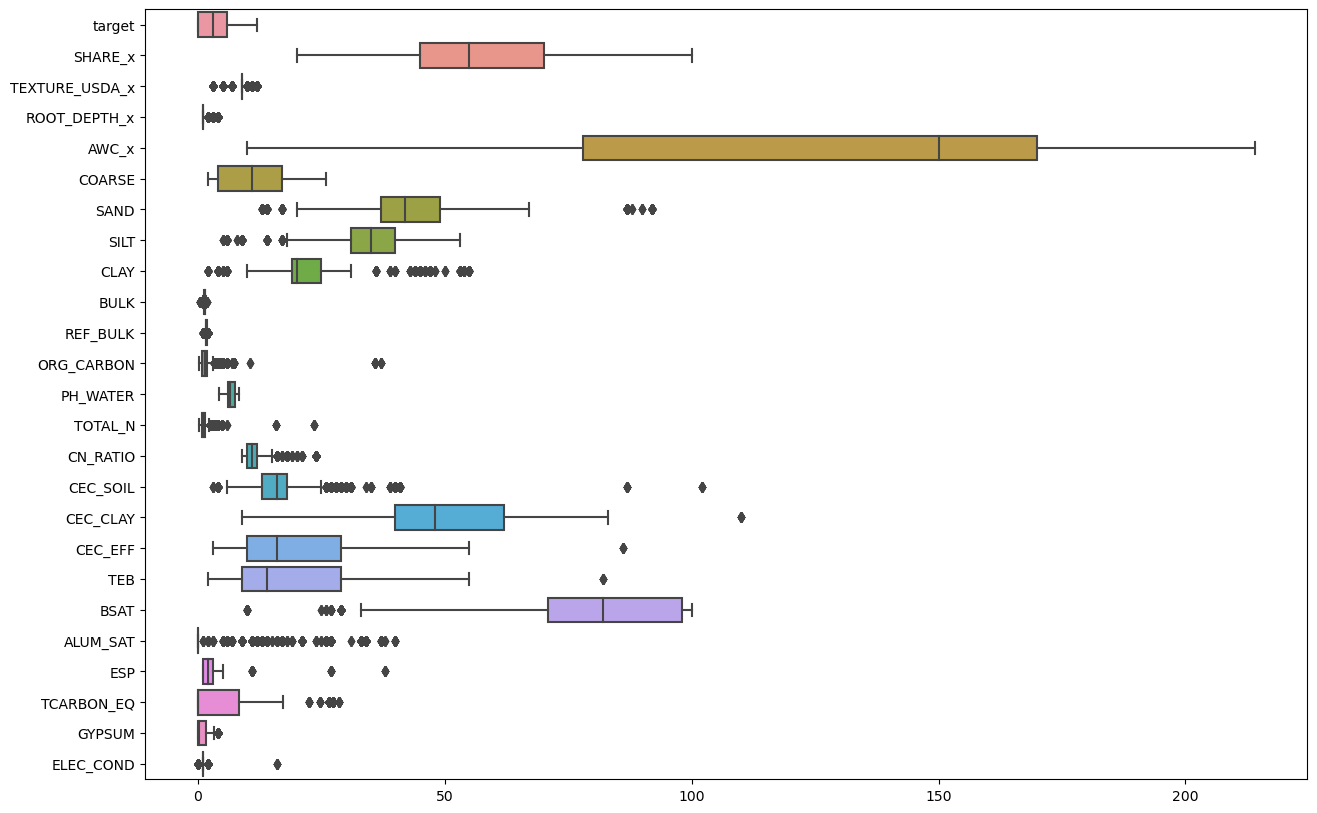

In [50]:
plt.figure(figsize = (15, 10))
sns.boxplot(data.iloc[:, :29], orient = 'h')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

X = df_Model.drop('target', axis=1)
y = df_Model['target']

In [52]:
print(X.shape, y.shape)

(13416, 107) (13416,)


In [ ]:
def Model_1_KFold(Model, Range):
    
    # 전체 지표 비교용
    accTrain = []
    accTest = []
    recTrain = []
    recTest = []
    
    indicatorMean = []
    
    # split만 한 경우
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = 0.2,
                                                        random_state = 13,
                                                        shuffle = True)
    
    print('\n<<<train test split: 0.2>>>')
    print('학습 데이터 크기: {}, 검증 데이터 크기: {}'.format(X_train.shape[0], X_test.shape[0]))
    
    Model.fit(X_train, y_train)
    
    # 결과 보기 위한 것
#     y_pred_train = Model.predict_proba(X_train)
#     y_pred = Model.predict_proba(X_test)
#     val_pred = np.round(y_pred_train, decimals = 3)

#     colNM = model.classes_
#     lg.coef_
#     result = pd.DataFrame(val_pred,
#                           columns = colNM)
#     result

#     predicted_classes = np.argmax(y_pred, axis=1)

# threshold = 0.5  # 기준값 설정
# max_proba = np.max(y_pred, axis=1)
# filtered_predictions = np.where(max_proba >= threshold, predicted_classes, -1)  # 기준치 이하인 경우 -1로 설정

# 결과를 데이터프레임으로 변환
#     result_2 = pd.DataFrame(predicted_classes.reshape(-1,1), columns=['Grape'])
#     result_2.value_counts()


    # 지표 보기 위한 것
    y_pred_train = Model.predict(X_train)
    y_pred = Model.predict(X_test)
    
    Acc_train = accuracy_score(y_train, y_pred_train)
    Acc_test = accuracy_score(y_test, y_pred)
    Recall_train = recall_score(y_train, y_pred_train, average = 'macro')
    Recall_test = recall_score(y_test, y_pred, average = 'macro')
    
    print('Train Acc: {}'.format(Acc_train))
    print('Test Acc:'.format(Acc_test))
    
    print('Train Recall:'.format(Recall_train))
    print('Test Recall:'.format(Recall_test))
    
    accTrain.append(Acc_train)
    accTest.append(Acc_test)    
    recTrain.append(Recall_train)
    recTest.append(Recall_test)

    # KFold 부분
    # 단순 split이 가장 성능이 좋다는 것을 확인하기 위한 장치
    
    for i in Range:

        print('\n<<<{}개로 나눈 것>>>'.format(i))

        skfold = StratifiedKFold(n_splits = i)
        
        # 횟수 확인용
        n_iter = 0
        
        cv_acc_train = []
        cv_acc_test = []
        cv_rec_train = []
        cv_rec_test = []
        
        # StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
        for train_index, test_index in skfold.split(X, y):
            X_train, X_test = X.loc[train_index], X.loc[test_index]
            y_train, y_test = y.loc[train_index], y.loc[test_index]
    
            Model.fit(X_train, y_train)
        
            # 지표 보기 위한 것
            y_pred_train = Model.predict(X_train)
            y_pred = Model.predict(X_test)

            Acc_train = accuracy_score(y_train, y_pred_train)
            Acc_test = accuracy_score(y_test, y_pred)
            Recall_train = recall_score(y_train, y_pred_train, average = 'macro')
            Recall_test = recall_score(y_test, y_pred, average = 'macro')
            
            cv_acc_train.append(Acc_train)
            cv_acc_test.append(Acc_test)
            cv_rec_train.append(Recall_train)
            cv_rec_test.append(Recall_test)
            
            n_iter += 1 

            print('\n#{0} 교차 검증 Acc: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
                 .format(n_iter, Acc_test, len(train_index), len(test_index)))
            print('#{} 검증 세트 인덱스:'.format(n_iter), test_index)

        print('\n<{}개의 Acc & Recall>'.format(i))
        print('## 교차 검증별 Train Acc:', cv_acc_train)
        print('## 교차 검증별 Test Acc:', cv_acc_test)
        print('## 평균 검증 Train Acc:', np.mean(cv_acc_train), '평균 검증 Test Acc: ', np.mean(cv_acc_test))
        print('\n')
        print('## 교차 검증별 Train Recall:', cv_rec_train)
        print('## 교차 검증별 Test Recall:', cv_rec_test)
        print('## 평균 검증 Train Recall:', np.mean(cv_rec_train), '평균 검증 Test Recall: ', np.mean(cv_rec_test))
        
        accTrain.append(np.mean(cv_acc_train))
        accTest.append(np.mean(cv_acc_test))    
        recTrain.append(np.mean(cv_rec_train))
        recTest.append(np.mean(cv_rec_train))
        
    indicatorMean = {'accTrain': accTrain, 'accTest': accTest, 'recTrain': recTrain, 'recTest': recTest}
    
    return indicatorMean

In [ ]:
def AccRecGraph(indicatorMean):
    plt.figure(figsize = (15, 10))
    palette = ['red', 'blue', 'green', 'purple']
    idx = 0

    for key, value in indicatorMean.items():
        plt.plot(range(1, RangeNum),
                 value,
                 color = palette[idx],
                 label = key)
        plt.xlabel('split Num')
        plt.ylabel(key)
#         plt.title((key).upper() + ' by split number')

        plt.legend()

        idx += 1
    plt.show()

### Model별 Acc, Recall 확인

In [ ]:
RangeNum = 10
indicatorMean = Model_1_KFold(LogisticRegression(solver = 'liblinear',random_state = 20), range(2, RangeNum))
AccRecGraph(indicatorMean)

In [ ]:
RangeNum = 10
indicatorMean = Model_1_KFold(DecisionTreeClassifier(random_state = 13), range(2, RangeNum))
AccRecGraph(indicatorMean)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier(n_estimators=1000,objective='multiclass',n_jobs = -1, random_state = 20,verbose = -1)
stkfold = StratifiedKFold(n_splits=5)

# 파라미터 그리드 정의
param_grid = {
    'boosting_type': ['dart'],
    'colsample_bytree': [0.88],
    'learning_rate': [0.028],
    'min_child_samples': [10],
    'num_leaves': [20],
    'reg_alpha': [0.76],
    'reg_lambda': [0.43],
    # 'subsample_for_bin': [40000],
    # 'subsample': [0.54],
    'class_weight': ['balanced']
}

# GridSearchCV 객체 생성
lgbm_gridsearch = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           scoring='accuracy',  # 원하는 평가 지표로 변경할 수 있습니다
                           cv=stkfold,                # 교차 검증 폴드 수
                           n_jobs=-1                 # 모든 CPU 코어 사용             
                           )         

RangeNum = 10
indicatorMean = Model_1_KFold(lgbm_gridsearch, range(2, RangeNum))
AccRecGraph(indicatorMean)

In [ ]:
#DecisionTree + gridseach

df_clf = DecisionTreeClassifier(random_state=20,max_depth=2)

param_grid = {"max_depth" : [2,4,7,10,12,16,20,24]}

indicatorMean = Model_1_KFold(tree_gridsearch, range(2, RangeNum))
AccRecGraph(indicatorMean)

### SVM 수행부분

In [ ]:
from sklearn.svm import SVC 

svm_clf = SVC(kernel = 'rbf',random_state=20, probability=True)

parameters = {'C': [0.001, 0.01, 0.1, 1, 10,25],
             'gamma':[0.001, 0.01, 0.1, 1, 10,25]}

gridsearch_svm = GridSearchCV(svm_clf, param_grid=parameters, cv=stkfold, return_train_score=True,scoring='accuracy',n_jobs=-1)
gridsearch_svm.fit(X_train, y_train)

cv_results = gridsearch_svm.cv_results_
results_df_5 = pd.DataFrame(cv_results)   
results_df_5.sort_values(by='rank_test_score', ascending=True, inplace=True)
results_df_5[['rank_test_score','param_C','param_gamma','mean_train_score','mean_test_score']]

In [ ]:
y_pred= gridsearch_svm.best_estimator_.predict(X_test)

Acc = accuracy_score(y_test,y_pred)
Recall = recall_score(y_test,y_pred,average='macro')
F1 = f1_score(y_test,y_pred,average='macro')
Precision = precision_score(y_test,y_pred,average='macro')

print('Acc: {} Recall: {} F1: {} Precision: {}'.format(Acc, Recall, F1, Precision))